# Исследование интернет-магазина «Стримчик» на закономерность успешности игры

# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных

* **Name** — название игры
* **Platform** — платформа
* **Year_of_Release** — год выпуска
* **Genre** — жанр игры
* **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
* **EU_sales** — продажи в Европе (миллионы проданных копий)
* **JP_sales** — продажи в Японии (миллионы проданных копий)
* **Other_sales** — продажи в других странах (миллионы проданных копий)
* **Critic_Score** — оценка критиков (максимум 100)
* **User_Score** — оценка пользователей (максимум 10)
* **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# План работы

1)  Открыть файл с данными и изучить общую информацию

2) Предобработка данных
* Заменить названия столбцов

* Преобразовать данные в нужные типы

* Обработать пропуски при необходимости

* Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец

3) Провести исследовательский анализ данных
* Посмотреть, сколько игр выпускалось в разные годы

* Посмотреть, как менялись продажи по платформам

* Взять данные за соответствующий актуальный период

* Какие платформы лидируют по продажам, растут или падают?

* Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам

* Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. 

* Посмотреть на общее распределение игр по жанрам

4) Составьте портрет пользователя каждого региона

Определить для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5)
* Самые популярные жанры (топ-5)
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

5) Проверка гипотез
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

6) Вывод

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats as st
import numpy as np
import seaborn as sns

### Шаг 1.  Загрузка данных

#### Задание 1: Считать данные пользователей из файла и изучить общую информацию 

In [2]:
df = pd.read_csv('games.csv')

In [3]:
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


##### Вывод:

1) Нужно привести названия столбцов к нижнему регистру

2) Нужно поменять типы данных в столбцах year_of_release на int64, user_score на float64

3) Заполнить пропуски, где это возможно

### Шаг 2.  Предобработка данных

#### Задание 1: Заменить названия столбцов 

In [4]:
df.columns = map(str.lower, df.columns)
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Задание 2: Обработать пропуски при необходимости

In [5]:
# Выведим кол-во пропущенных значений в процентах
(df.isna().sum() / len(df) * 100).round(2).sort_values()

platform            0.00
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
name                0.01
genre               0.01
year_of_release     1.61
user_score         40.09
rating             40.48
critic_score       51.32
dtype: float64

В столбце **name** имеются 0.01% пропусков. Из-за маленького кол-ва пропусков, мы удалим их

In [6]:
df = df.dropna(subset=['name'])

# Проверим на пропуски
(df.isna().sum() / len(df) * 100).round(2).sort_values()

name                0.00
platform            0.00
genre               0.00
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
year_of_release     1.61
user_score         40.08
rating             40.47
critic_score       51.31
dtype: float64

В столбце **year_of_release** имеются 1.61% пропусков. Мы пропуски заполним нулями. 

In [7]:
df['year_of_release'] = df['year_of_release'].fillna(0)
# Проверим на пропуски
(df.isna().sum() / len(df) * 100).round(2)

name                0.00
platform            0.00
year_of_release     0.00
genre               0.00
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.31
user_score         40.08
rating             40.47
dtype: float64

В столбце **critic_score** имеются  51.37% пропусков, в столбце **user_score** имеются  40.08% пропусков, в столбце **rating** имеются  40.47% пропусков. Пропуски возможно появился, из-за того что не успели еще выставить оценку и рейтинг игре. Пропуски мы трогать не будем

In [8]:
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце с оценкой пользователей имеется значение 'tbd'. TBD — это аббревиатура, которая обозначает *To Be Determined*   (Предстоит определить), что значит оценку игре пользователи еще не успели поставить. Мы заменим это значение на Nan

In [9]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

#### Задание 3: Преобразовать данные в нужные типы

In [10]:
df['year_of_release'] = df['year_of_release'].astype('int64')
df['user_score'] = df['user_score'].astype('float64')
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

#### Задание 4: Посчитать суммарные продажи во всех регионах

In [11]:
df['general_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df['general_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: general_sales, Length: 16713, dtype: float64

##### Вывод:

1) Мы привели названия столбцов к нижнему регистру

2) Обработали пропуски в стобцах:

* name
* year_of_release

Оставили пропуски в столбцах 
* critic_score
* user_score
* raiting

3) В столбце с оценкой пользователей имеется значение *tbd*. Мы заменим это значение на *Nan*

4) Поменяли типы данных в столбцах year_of_release на int64, user_score на float64

### Шаг 3. Исследовательский анализ данных

#### Задание 1. Посмотреть, сколько игр выпускалось в разные годы. 

In [12]:
min_year = df.query('year_of_release > 0')
print(f'Минимальный год выпуски игр:{min_year.year_of_release.min()}')

Минимальный год выпуски игр:1980


In [13]:
print(f'Максимальный год выпуски игр:{df.year_of_release.max()}')

Максимальный год выпуски игр:2016


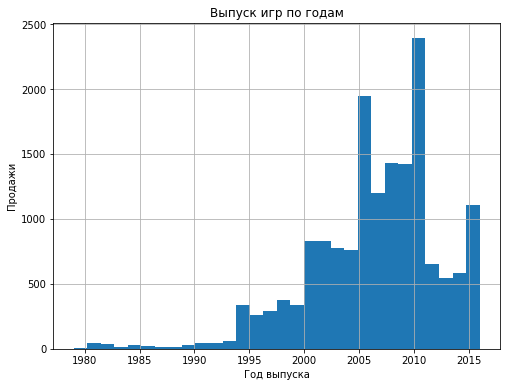

In [14]:
df['year_of_release'].plot(kind='hist', bins = 30, range=(1979, 2016), title='Выпуск игр по годам', figsize=(8,6), grid=True)
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
None

Посмотрим выпуск игр по годам с разницей в 10 лет

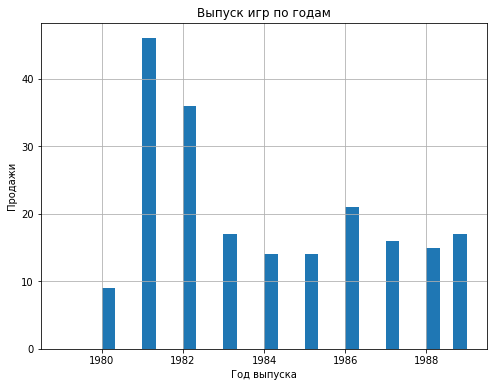

In [15]:
df['year_of_release'].plot(kind='hist', bins = 30, range=(1979, 1989), title='Выпуск игр по годам', figsize=(8,6), grid=True)
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
None

##### Вывод: Минимальный год игр является 1980 год. Мы видим что с 1980 по 1989 года выходило не так много игр

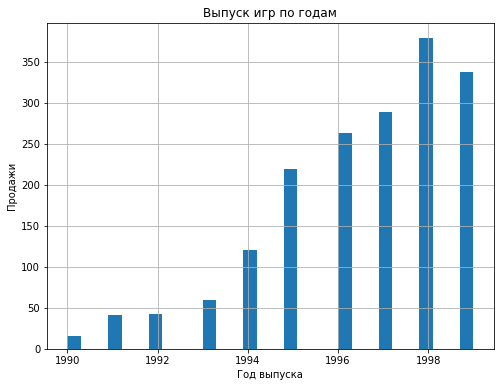

In [16]:
df['year_of_release'].plot(kind='hist', bins = 30, range=(1990, 1999), title='Выпуск игр по годам', figsize=(8,6), grid=True)
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
None

##### Вывод: Мы видим что с 1990 по 2000 года выпуск игр увеличивалось по сравнению с прошлым десятилетием

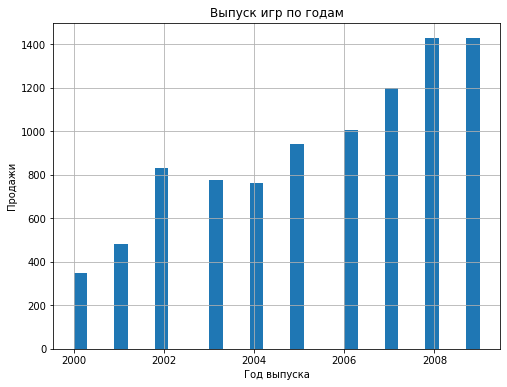

In [17]:
df['year_of_release'].plot(kind='hist', bins = 30, range=(2000, 2009), title='Выпуск игр по годам', figsize=(8,6), grid=True)
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
None

##### Вывод: Мы видим, что с 2008 года намного больше выпускали игры

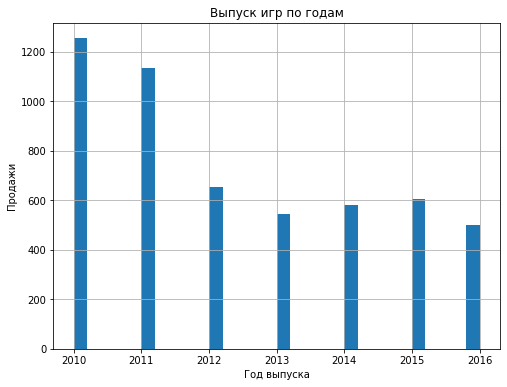

In [18]:
df['year_of_release'].plot(kind='hist', bins = 30, range=(2010, 2016), title='Выпуск игр по годам', figsize=(8,6), grid=True)
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
None

##### Вывод: Мы видим, что после 2011 года намного меньше выпускали игры

#### Задание 2: Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Топ 20 лучших платформ по продажам

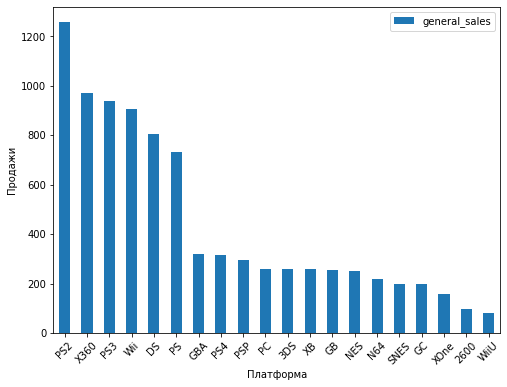

In [19]:
platform_sort = df.pivot_table(index='platform', values='general_sales', aggfunc='sum').sort_values(by='general_sales', ascending=False)
top_20_platforms = platform_sort.head(20)
top_20_platforms.plot(y='general_sales', kind='bar', figsize=(8,6))
plt.xticks(rotation = 45)
plt.xlabel('Платформа')
plt.ylabel('Продажи')
None

<a id='id_01'></a>

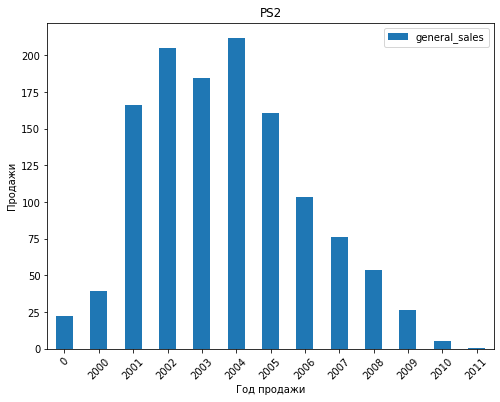

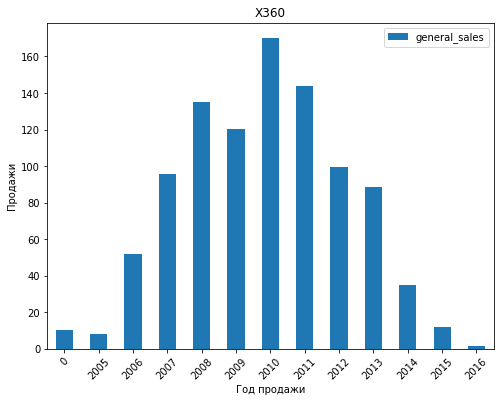

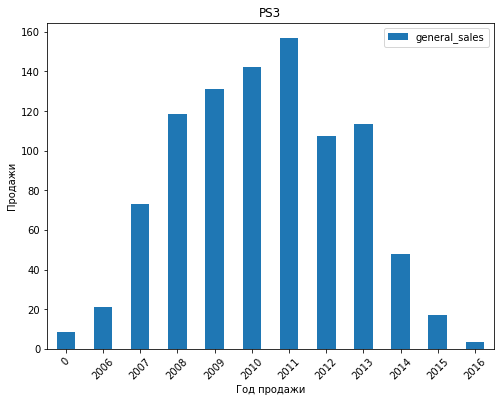

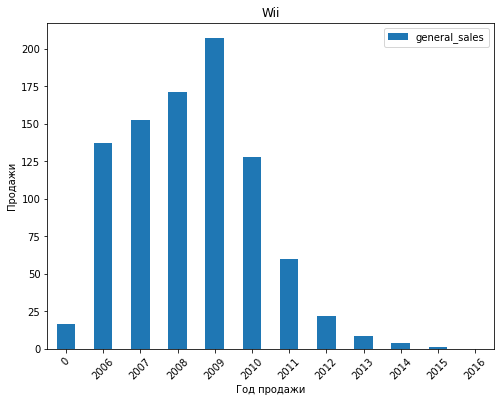

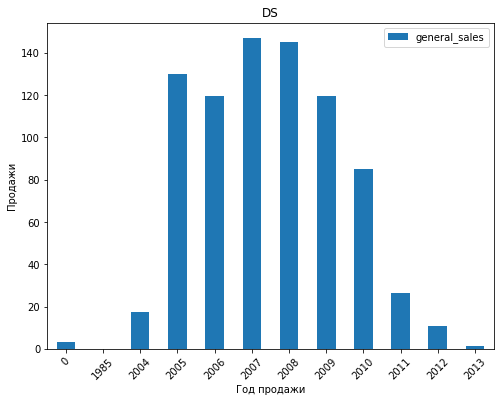

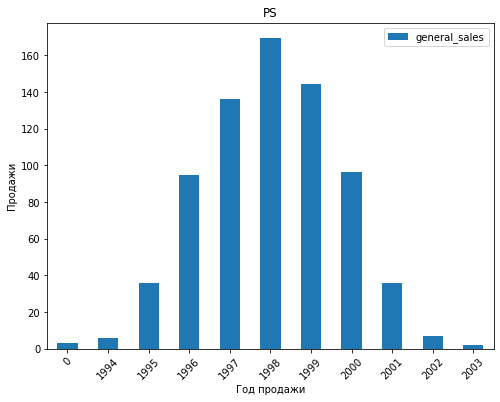

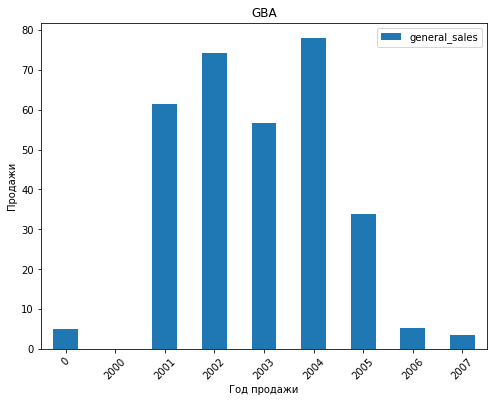

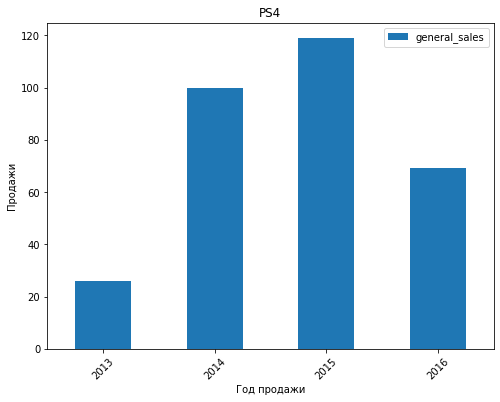

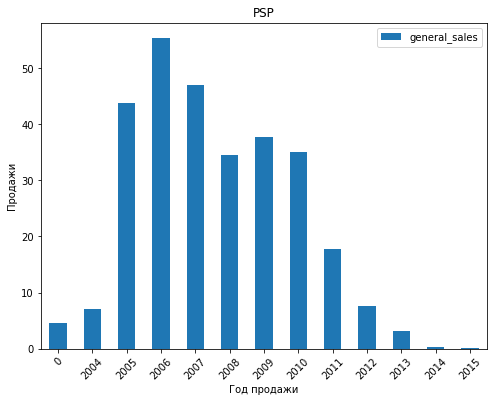

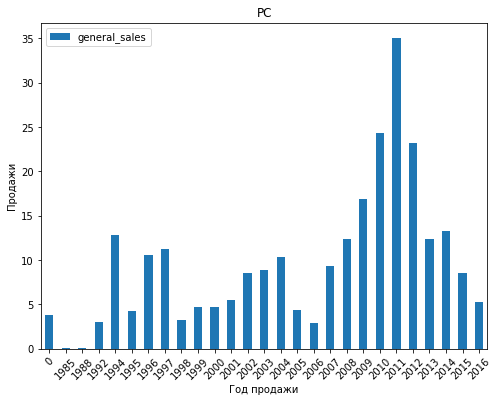

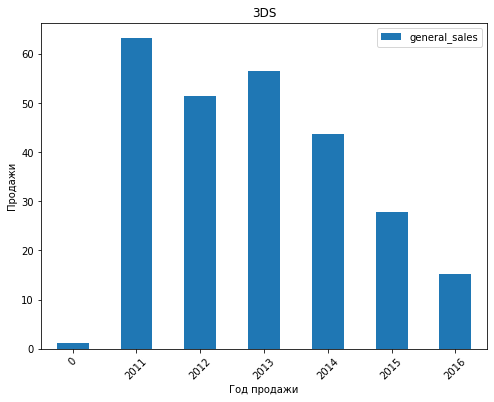

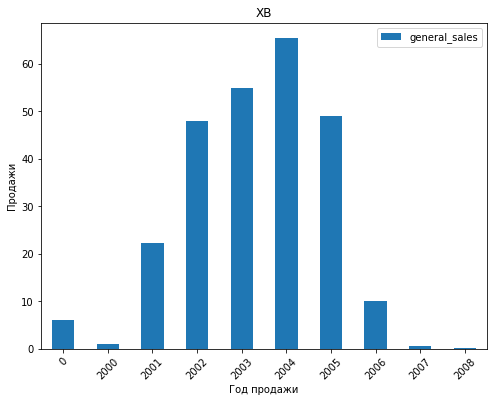

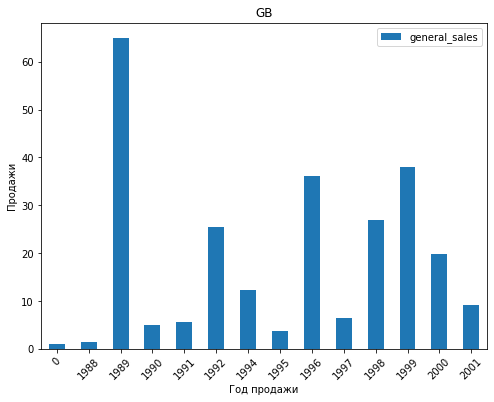

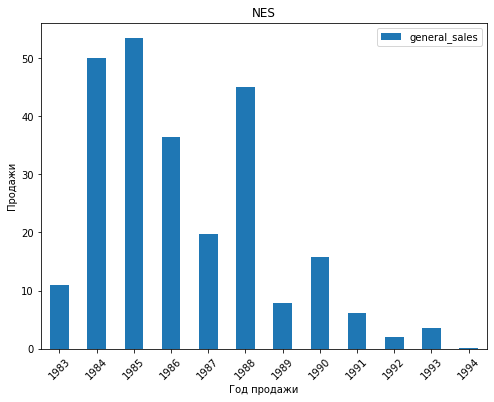

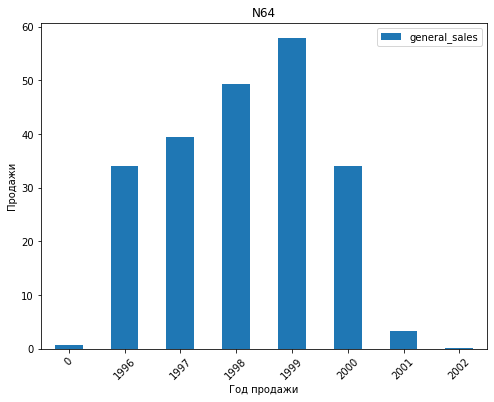

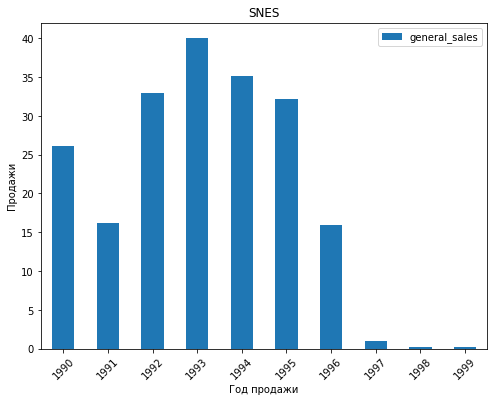

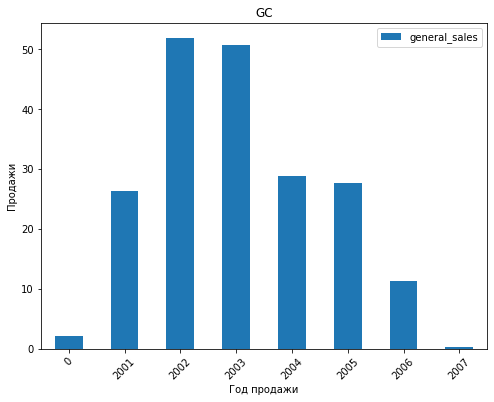

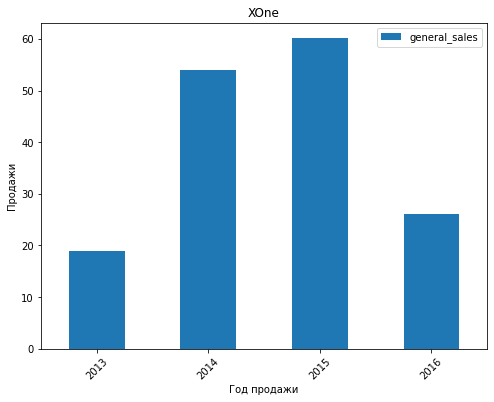

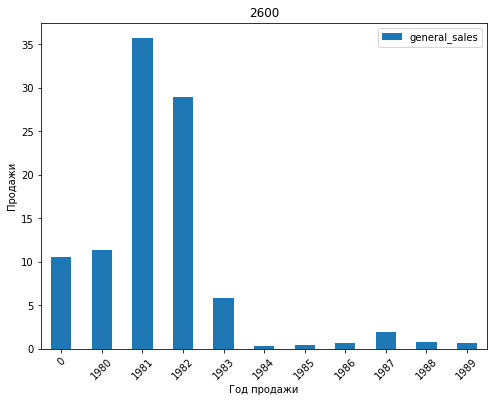

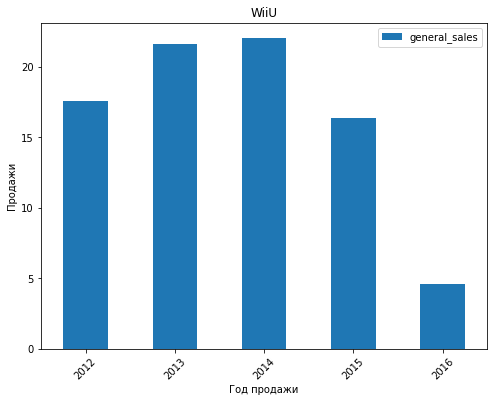

In [20]:
for platform in top_20_platforms.index:
    df.query('platform == @platform').pivot_table(index = 'year_of_release', values = 'general_sales', aggfunc = 'sum').plot(kind = 'bar', figsize=(8,6), title=platform)
    plt.xticks(rotation = 45)
    plt.xlabel('Год продажи')
    plt.ylabel('Продажи')

##### Вывод: Платформа является актуальной примерно 10 лет

#### Задание 3: Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Так как мы строим прогноз на 2017 год, не нужно сильно уходить от этого года, так как это будет влиять на исследование. Но так же чем больше выборка, тем точнее результат. Мы возьмем период с 2013 по 2016

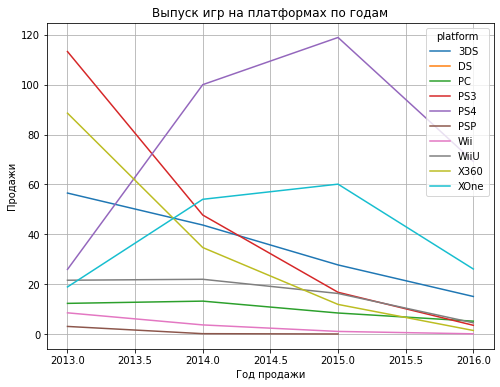

In [21]:
current_df = df.query('year_of_release >= 2013')
(current_df.query('platform in @top_20_platforms.index')
 .pivot_table(index='year_of_release', columns='platform', values='general_sales', aggfunc='sum')
 .plot(grid=True, title='Выпуск игр на платформах по годам', figsize=(8,6))
)
plt.xlabel('Год продажи')
plt.ylabel('Продажи')
None

##### Вывод: 
1) По продажам все платформы падают по продажам

2) PS4, XOne, 3DS являются самыми  актуальными платформами для 2017

3) PS3 и X360 очень сильно падают по продажам

4) Остальные платформы являются не актуальными для 2017 года

#### Задание 4: Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

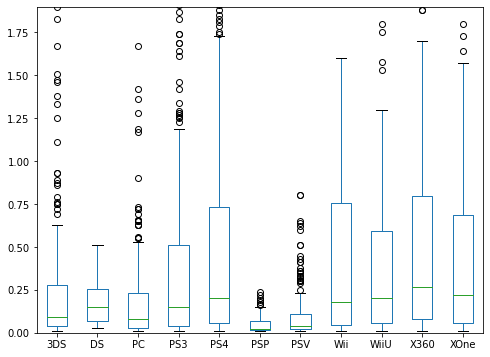

In [22]:
current_df.pivot_table(index = 'name', columns = 'platform', values = 'general_sales', aggfunc = 'sum').plot(kind='box', ylim=(0,1.9), figsize=(8,6))
None

##### Вывод: 
1) У PS3 и X360 больше всего продажи, но со временем их актуальность снизилась

2) У PS4 и XOne не так много продаж, но со временем они увеличаться, так как это довольно современные платформы

#### Задание 5: Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами

Мы возьмем платформы которые на данный момент являются актуальными: PS4, XOne, 3DS

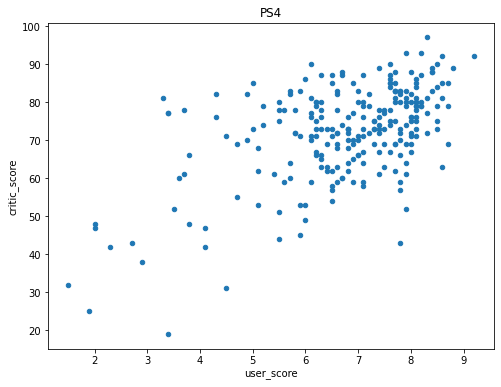

In [23]:
PS4 = current_df.query('platform == "PS4"')
PS4.plot(x='user_score', y='critic_score', kind='scatter', figsize=(8,6),title='PS4')
None

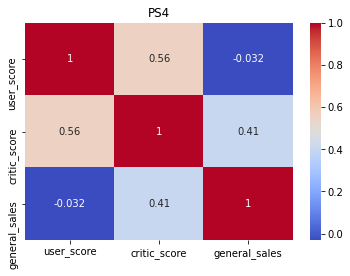

In [24]:
PS4_corr = PS4[['user_score', 'critic_score', 'general_sales']]
sns.heatmap(PS4_corr.corr(), annot = True, cmap = 'coolwarm')
plt.title('PS4')
None

##### Вывод: 
1) Мы видим что у *user_score* и *critic_score* положительная корреляция. 

2) У *general_sales* и *user_score* отсутствует линейная зависимость(корреляция близка к нулю), а *critic_score* положительная

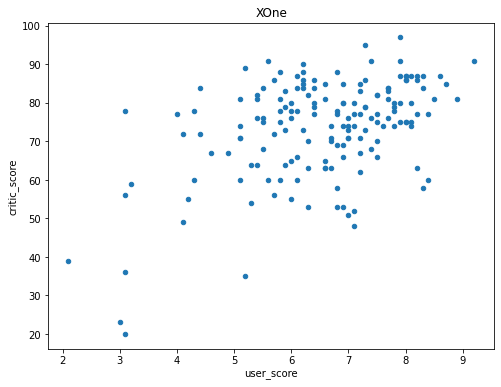

In [25]:
XOne = current_df.query('platform == "XOne"')
XOne.plot(x='user_score', y='critic_score', kind='scatter', figsize=(8,6),title='XOne')
None

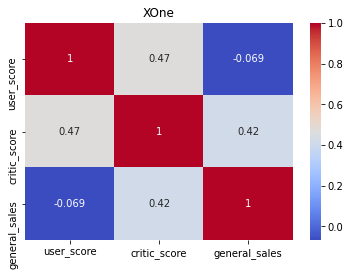

In [26]:
XOne_corr = XOne[['user_score', 'critic_score', 'general_sales']]
sns.heatmap(XOne_corr.corr(), annot = True, cmap = 'coolwarm')
plt.title('XOne')
None

##### Вывод: 
1) Мы видим что у *user_score* и *critic_score* положительная корреляция. 

2) У *general_sales* и *user_score* отсутствует линейная зависимость(корреляция близка к нулю), а *critic_score* положительная

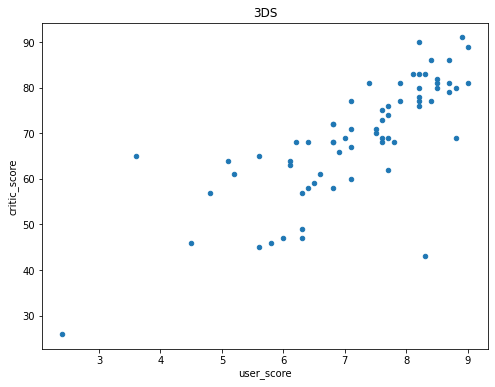

In [27]:
_3DS = current_df.query('platform == "3DS"')
_3DS.plot(x='user_score', y='critic_score', kind='scatter', figsize=(8,6),title='3DS')
None

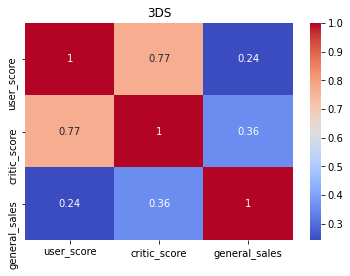

In [28]:
_3DS_corr = _3DS[['user_score', 'critic_score', 'general_sales']]
sns.heatmap(_3DS_corr.corr(), annot = True, cmap = 'coolwarm')
plt.title('3DS')
None

##### Вывод: 
1) Мы видим что у *user_score* и *critic_score* положительная корреляция. 

2) У *general_sales* и *user_score* слабая положительная корреляция, и также с *critic_score* 

#### Задание 6: Посмотреть на общее распределение игр по жанрам

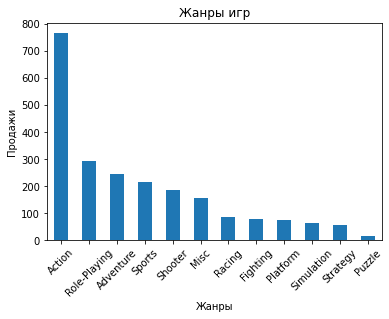

In [29]:
genre = current_df['genre'].value_counts(ascending=False)
genre.plot(kind='bar', title='Жанры игр')
plt.xticks(rotation = 45)
plt.xlabel('Жанры')
plt.ylabel('Продажи')
None

##### Вывод:

1) Самый популярный жанр в играх это Action

2) Самый непопулярный жанр это Puzzle

### Шаг 4.  Портрет пользователя каждого региона

#### Задание 1: Самые популярные платформы (топ-5). Опишите различия в долях продаж.

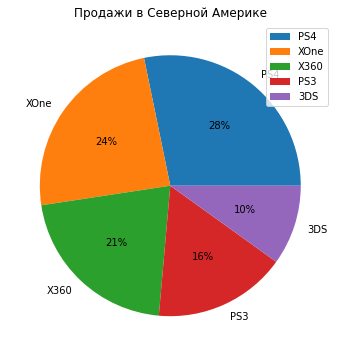

In [30]:
(current_df.query('platform in @top_20_platforms.index')
 .pivot_table(index='platform', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=False)
 .head()
 .plot(y='na_sales', kind='pie', title='Продажи в Северной Америке', autopct='%1.0f%%',ylabel=(''), figsize=(8,6))
)

None

##### Вывод: Топ 5 платформ по продажам в Северной Америкке
1) В Северной Америке популярны американские и японские консоли

2) Если сложить продажи то получится, что американский рынок больше всего занимают японские консоли

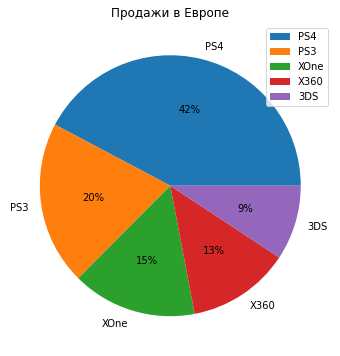

In [31]:
(current_df.query('platform in @top_20_platforms.index')
 .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=False)
 .head()
 .plot(y='eu_sales', kind='pie', title='Продажи в Европе', autopct='%1.0f%%', ylabel=(''),  figsize=(8,6))
)
None

##### Вывод: Топ 5 платформ по продажам в Европе
1) В Европе популярны американские и японские консоли

2) Если сложить продажи то получится, что европейский рынок больше всего занимают японские консоли

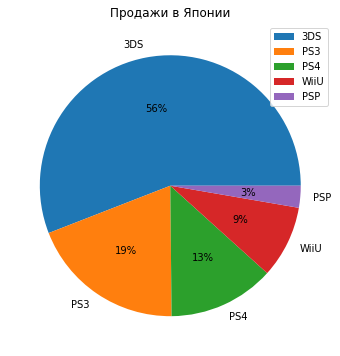

In [32]:
(current_df.query('platform in @top_20_platforms.index')
 .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=False)
 .head()
 .plot(y='jp_sales', kind='pie', title='Продажи в Японии', autopct='%1.0f%%', figsize=(8,6))
)
plt.ylabel('')
None

##### Вывод: В Японии доминируют только японские консоли

#### Задание 2: Самые популярные жанры (топ-5)

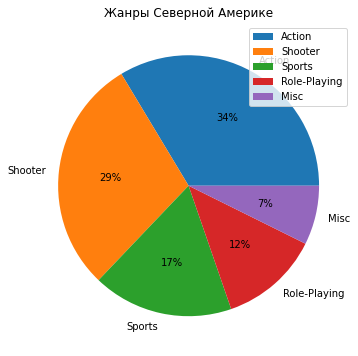

In [33]:
(current_df.pivot_table(index='genre', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=False)
 .head()
 .plot(y='na_sales', kind='pie', title='Жанры Северной Америке', autopct='%1.0f%%', ylabel=(''), figsize=(8,6))
)
None

##### Вывод: В Северной Америке больше всего играют в игры жанра Action. Меньше всего людям нравятся Misc

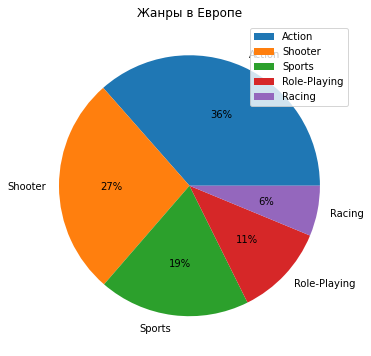

In [34]:
(current_df.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=False)
 .head()
 .plot(y='eu_sales', kind='pie', title='Жанры в Европе', autopct='%1.0f%%', figsize=(8,6))
)
plt.ylabel('')
None

##### Вывод: В Европе, как и в Северной Америке больше всего играют в игры жанра Action, и меньше всего людям нравятся Racing

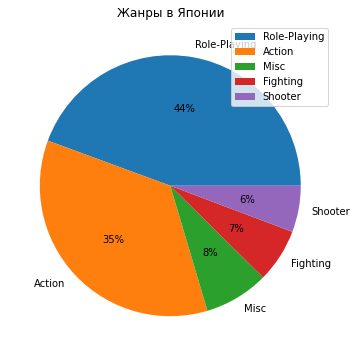

In [35]:
(current_df.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=False)
 .head()
 .plot(y='jp_sales', kind='pie', title='Жанры в Японии', autopct='%1.0f%%', figsize=(8,6))
)
plt.ylabel('')
None

##### Вывод: В Японии в отличие от других регионов преобладают игры жанра Role-Playing, и жанр игр Shooter занимает последнее место

#### Задание 3: Влияет ли рейтинг ESRB на продажи в отдельном регионе?

<a id='id_02'></a>

In [36]:
current_df.pivot_table(index='rating', values=['eu_sales', 'na_sales', 'jp_sales'], aggfunc='sum')

,eu_sales,jp_sales,na_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
T,41.95,20.59,49.79


##### Вывод: Рейтинг влияет на продажу игр в регионах. Игры рейтинга M продавались лучше всего во всех регионах. Хуже всего продаются игры рейтинг которых является E10+

### Шаг 5. Проверка гипотез

#### Задание 1: Одинаковые ли средние пользовательские рейтинги платформ Xbox One и PC ?

$H_0$: Средние пользовательские рейтинги платформ Xbox One и PC равны

$H_1$: Средние пользовательские рейтинги платформ Xbox One и PC не равны

$\alpha$ = 0.05

In [37]:
alpha = 0.05

XOne = current_df.query('platform == "XOne"')['user_score'].dropna().reset_index(drop=True)
PC = current_df.query('platform == "PC"')['user_score'].dropna().reset_index(drop=True)

results = st.ttest_ind(XOne, PC)
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

print(f'Средние пользовательские рейтинги платформ Xbox One: {XOne.mean()}')
print(f'Средние пользовательские рейтинги платформ PC: {PC.mean()}')

p-value: 0.14012658403611647
Нет оснований отвергнуть нулевую гипотезу
Средние пользовательские рейтинги платформ Xbox One: 6.521428571428572
Средние пользовательские рейтинги платформ PC: 6.2696774193548395


##### Вывод: Платформы Xbox One и PC  имеют одинаковый средний пользовательский рейтинг 

#### Задание 2: Разные ли средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») ?

$H_0$: Средние пользовательские рейтинги жанров Action и Sports равны

$H_1$: Средние пользовательские рейтинги жанров Action и Sports не равны

$\alpha$ = 0.05

In [38]:
alpha = 0.05

Action = current_df.query('genre == "Action"')['user_score'].dropna().reset_index(drop=True)
Sports = current_df.query('genre == "Sports"')['user_score'].dropna().reset_index(drop=True)

results = st.ttest_ind(Action, Sports)
print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

print(f'Средние пользовательские рейтинги жанра Action: {Action.mean()}')
print(f'Средние пользовательские рейтинги жанра Sports: {Sports.mean()}')

p-value: 1.0517832389140023e-27
Отвергаем нулевую гипотезу
Средние пользовательские рейтинги жанра Action: 6.837532133676092
Средние пользовательские рейтинги жанра Sports: 5.238124999999999


##### Вывод: Жанры Action и Sports  имеют разный средний пользовательский рейтинг 

### Шаг 6. Вывод

# Предобработка данных

1) Мы привели названия столбцов к нижнему регистру

2) Заполнили пропуски при необходимости:

* В столбце **name** имелись 0.01% пропусков. Из-за маленького кол-ва пропусков, мы удалим их

* В столбце **year_of_release** имелись 1.61% пропусков. Мы пропуски заполним нулями.

* В столбце **critic_score** имеются 51.37% пропусков, в столбце **user_score** имеются 40.08% пропусков, в столбце **rating** имеются 40.47% пропусков. Пропуски возможно появился, из-за того что не успели еще выставить оценку и рейтинг игре. Пропуски мы трогать не будем

3) В столбце с оценкой пользователей имелись значение *tbd*. Мы заменили это значение на *Nan*

4) Поменяли типы данных в столбцах year_of_release на int64, user_score на float64

----

# Исследовательский анализ данных

1) Данные даны с 1980 по 2016 год. С 2008 по 2011 выпускали больше всего игр
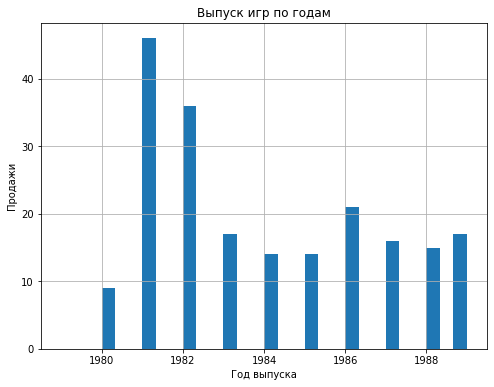
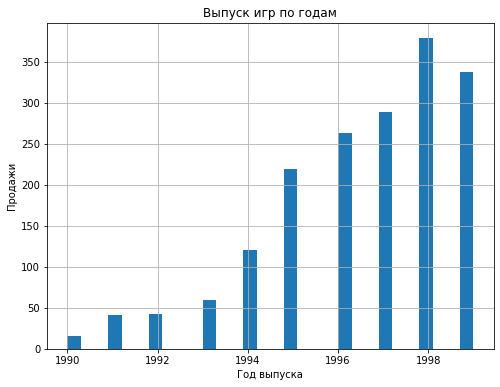
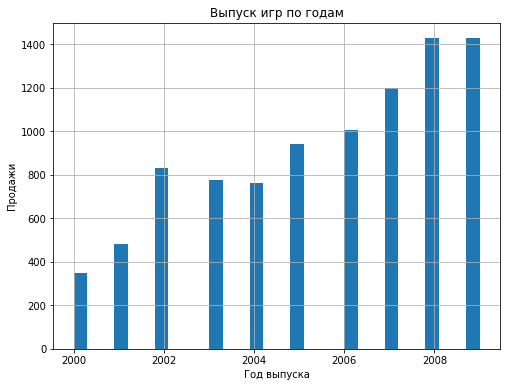
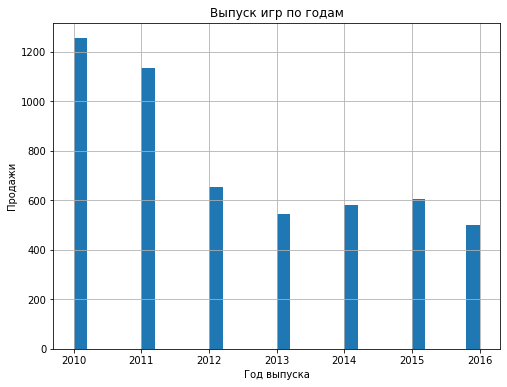

2) Актульность платформ является примерно 10 лет. [Посмотреть графики продаж на 20 платформах](#id_01)

3) 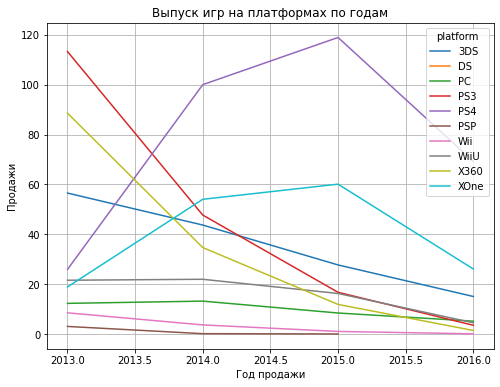
* По продажам все платформы падают по продажам

* PS4 и XOne 3DS являются самыми актуальными платформами для 2017

* PS3 и X360 очень сильно падают по продажам

* Остальные платформы являются не актуальными для 2017 года

4) 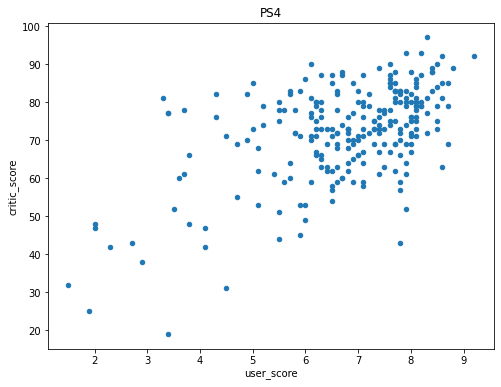
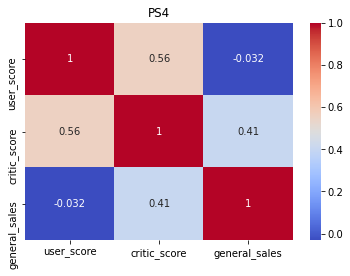

* Критики и пользователи ставили почти одинаковые положительные оценки игре на PS4

* Влияет на продажи игры только оценки критиков

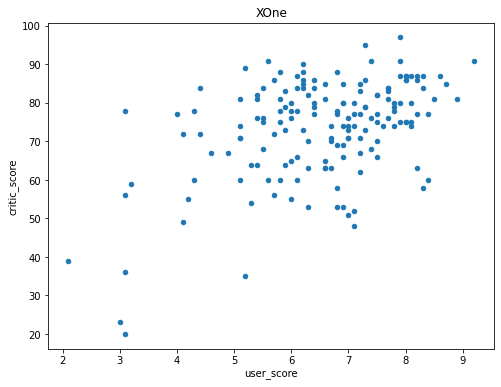
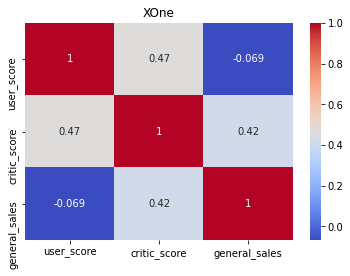

* Критики и пользователи ставили почти одинаковые положительные оценки игре на XboxOne

* Влияет на продажи игры только оценки критиков

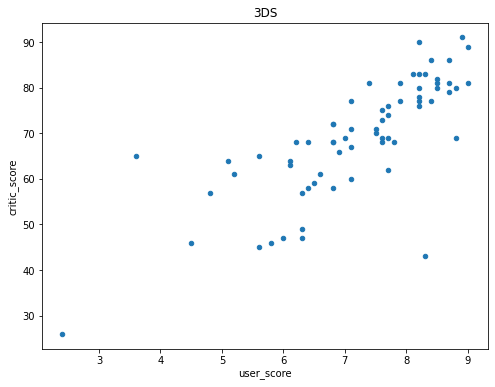
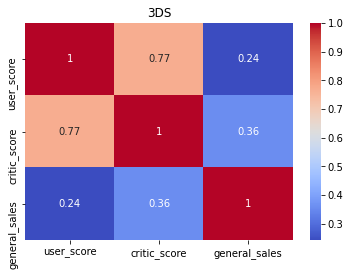

* Критики и пользователи ставили почти одинаковые положительные оценки игре на 3DS

* Влияет на продажи игры больше оценки критиков, чем оценка пользователей

5) 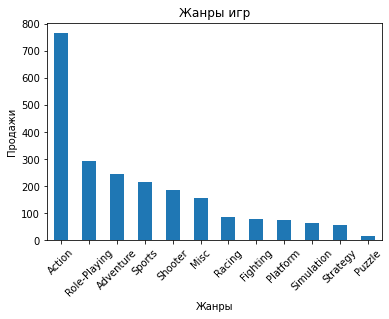

* Самый популярный жанр в играх это Action

* Самый непопулярный жанр это Puzzle

----

# Портрет пользователя каждого региона
1) 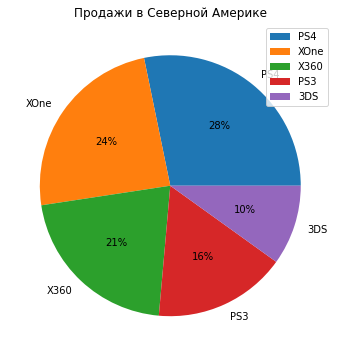
* В Северной Америке популярны американские и японские консоли
* Если сложить продажи то получится, что американский рынок больше всего занимают японские консоли

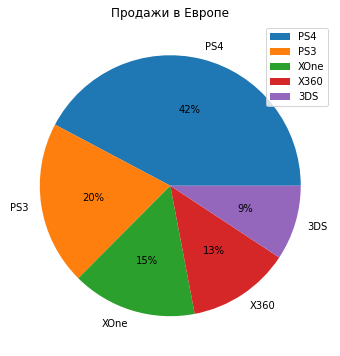
* В Европе популярны американские и японские консоли
* Если сложить продажи то получится, что европейский рынок больше всего занимают японские консоли

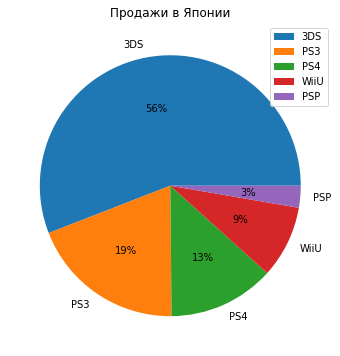
* В Японии доминируют только японские консоли

2) 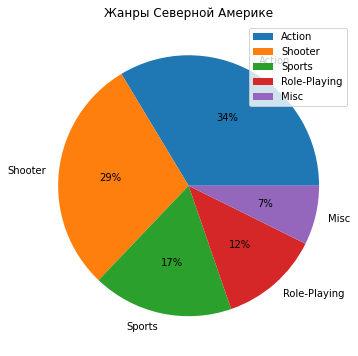
* В Северной Америке больше всего играют в игры жанра Action
* Меньше всего людям нравятся Misc

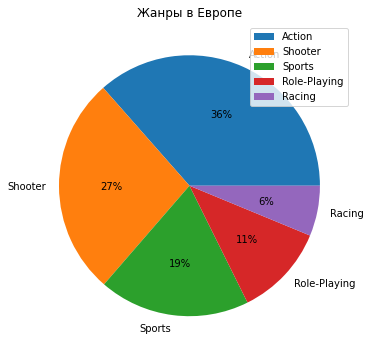
* В Европе больше всего играют в игры жанра Action
* Меньше всего людям нравятся Racing

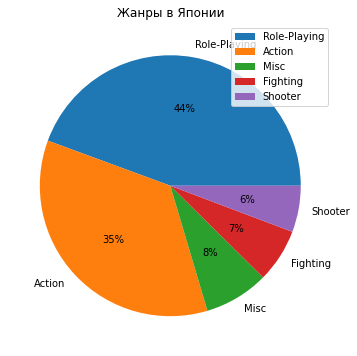
* В Японии в отличие от других регионов преобладают игры жанра Role-Playing
* Меньше всего людям нравятся Shooter

3) Рейтинг влияет на продажу игр в регионах. [Посмотреть таблицу продаж игр в регионах с разным рейтингом](#id_02)

----

# Проверка гипотез

1) Платформы Xbox One и PC имеют одинаковый средний пользовательский рейтинг

2) Жанры Action и Sports имеют разный средний пользовательский рейтинг